In [2]:
import numpy as np
data_pine = np.loadtxt('pine_full.csv',skiprows=1,delimiter=",")
#https://fbertran.github.io/plsRglm/reference/pine.html
pine_y = data_pine[:,-1]
pine_X = data_pine[:,:-1]

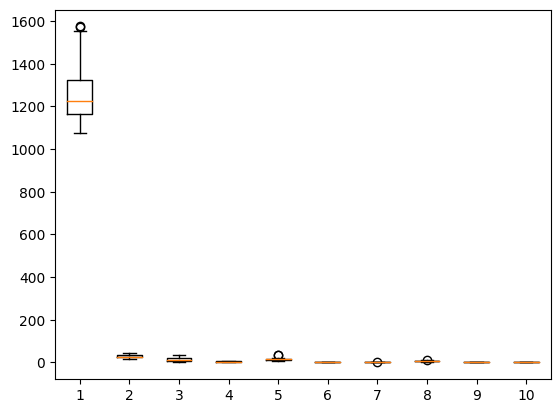

In [3]:
import matplotlib.pyplot as plt
plt.boxplot(pine_X);

In [4]:
n,p = pine_X.shape


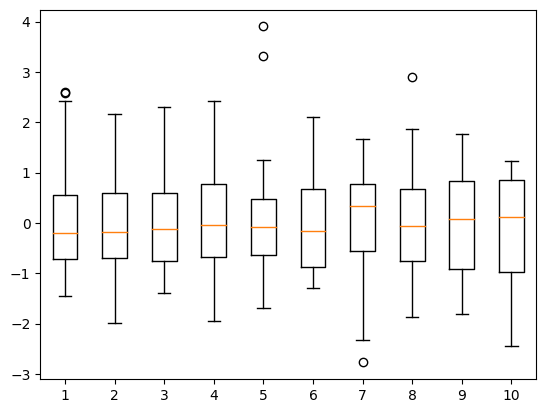

In [6]:
X_norm = (pine_X - np.mean(pine_X,axis=0))/np.std(pine_X,axis=0)
plt.boxplot(X_norm);

In [7]:
n,p

(58, 10)

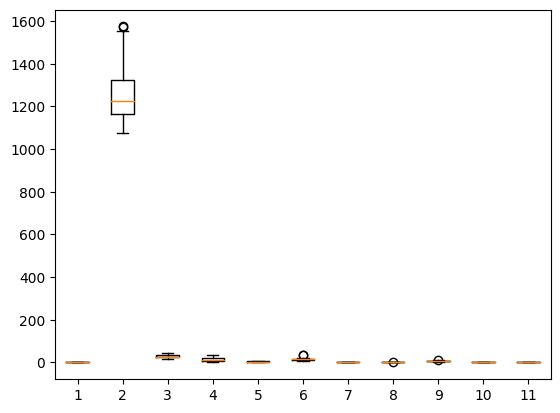

In [24]:
X_bias = np.concatenate([np.ones((n,1)), pine_X],axis=1)
plt.boxplot(X_bias);

In [29]:
alpha = np.linalg.inv(X_bias.T@X_bias)@X_bias.T@pine_y
y_pred = X_bias @ alpha
with np.printoptions(precision=2):
    for i,coef in enumerate(alpha):
        print(f"{i} : {coef}")

0 : 8.215225409099624
1 : -0.00359866086722939
2 : -0.034002709821384106
3 : -0.02234129897657002
4 : -0.41437365255686787
5 : 0.12263455490896306
6 : 1.4964268286648439
7 : -0.4802481184136348
8 : 0.0013816380076005514
9 : -1.7297947641847433
10 : 0.038454873952848814


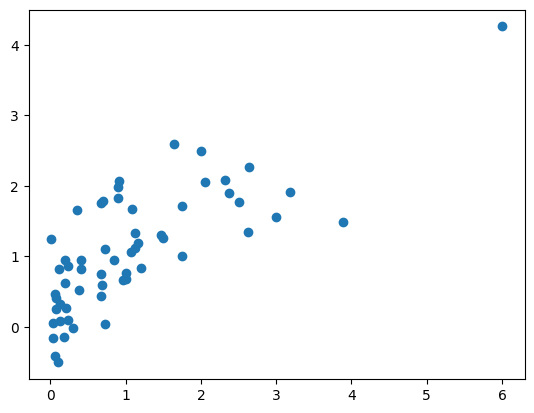

In [23]:
plt.plot(pine_y,y_pred,'o')

In [30]:
alpha = np.linalg.solve(X_bias.T@X_bias, X_bias.T@pine_y)
print(alpha)

[ 8.21522541e+00 -3.59866087e-03 -3.40027098e-02 -2.23412990e-02
 -4.14373653e-01  1.22634555e-01  1.49642683e+00 -4.80248118e-01
  1.38163801e-03 -1.72979476e+00  3.84548740e-02]
